In [69]:
#use state variables to get action (0 or 1)

In [70]:
import gymnasium as gym
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from itertools import count
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from dqn import DQN, Transition, DataBuffer

env = gym.make("CartPole-v1")

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [71]:
state, info = env.reset()
n_observations = len(state)
n_actions = env.action_space.n

In [72]:
#plot cartpole actions against states/other variables
#where does this data come from? 

#run a random agent and see what it does
#use a q-table to choose actions

In [73]:
#agent class

class Agent:
    
    
    def __init__(self, states, actions):
        self.q = {}
        self.memory = []
        self.actions = [a for a in range(actions)]
        self.alpha = 0.8
        self.epsilon = 0.9
        self.epsilon_decay = 0.99
        self.gamma = 0.7
    
    def update(self, state, action, reward, new_value):
        current_q = self.q.get(state)[action] 
        if current_q == 0:
            self.q[state][action] = reward
        else:
            self.set_q(state, action, current_q + self.alpha * (new_value - current_q))
            
    def learn(self, state, action, reward, state2, _):
        max_q = max([self.q.get(state2)[a] for a in self.actions])
        self.update(state, action, reward, reward + self.gamma * max_q)
        
    def batch_rows(self, state, state2, action):
        self.memory.append([state, state2, action])
        
    def act(self, state):
        action = random.choice(self.actions)
        #choose sample policy based on feature relationships
        #action = state*weight + b
        #look at memory dataframe
            
        return action

In [74]:
n_actions = env.action_space.n
state = env.reset()
n_observations = len(state)

agent = Agent(states=n_observations, actions=n_actions)

episodes = 1
total_steps = 0
total_reward = 0

for episode in range(episodes):
    
    state = env.reset()
    reward = 0
    steps = 0
    done = False
    
    while not done:
        action = agent.act(state) #random policy
        next_state, reward, done, info, _ = env.step(action)
        agent.batch_rows(state, next_state, action)
        state = next_state
        
        steps += 1
        total_reward += reward

    total_steps += steps

In [75]:
df = pd.DataFrame(agent.memory)[1:]
df.rename(columns={0: 'state', 1: 'next_state', 2: 'action'}, inplace=True)
df2 = pd.DataFrame(df['state'].to_list(), columns=['state_var1','state_var2', 'state_var3', 'state_var4'])
df3 = pd.DataFrame(df['next_state'].to_list(), columns=['next_state_var1','next_state_var2', 
                                                        'next_state_var3', 'next_state_var4'])

In [76]:
dfa = pd.concat([df2, df3, df.reset_index()['action']], axis=1)

In [77]:
dfa

,state_var1,state_var2,state_var3,state_var4,next_state_var1,next_state_var2,next_state_var3,next_state_var4,action
0,0.031524,-0.239197,-0.047797,0.305961,0.026740,-0.043428,-0.041678,-0.001405,1
1,0.026740,-0.043428,-0.041678,-0.001405,0.025871,0.152266,-0.041706,-0.306941,1
2,0.025871,0.152266,-0.041706,-0.306941,0.028916,-0.042237,-0.047845,-0.027698,0
3,0.028916,-0.042237,-0.047845,-0.027698,0.028072,-0.236641,-0.048399,0.249514,0
4,0.028072,-0.236641,-0.048399,0.249514,0.023339,-0.431040,-0.043409,0.526547,0
5,0.023339,-0.431040,-0.043409,0.526547,0.014718,-0.235335,-0.032878,0.220508,1
6,0.014718,-0.235335,-0.032878,0.220508,0.010011,-0.039759,-0.028468,-0.082362,1
7,0.010011,-0.039759,-0.028468,-0.082362,0.009216,-0.234461,-0.030115,0.201205,0
8,0.009216,-0.234461,-0.030115,0.201205,0.004527,-0.429140,-0.026091,0.484238,0
9,0.004527,-0.429140,-0.026091,0.484238,-0.004056,-0.623884,-0.016406,0.768585,0


In [78]:
policy_action = (dfa['state_var1'] > 0) & (dfa['state_var2'] > 0) & (dfa['state_var3'] < .15) & (dfa['state_var4'] > .5)
dfa['policy_action'] = policy_action.astype(int)

In [79]:
dfa

,state_var1,state_var2,state_var3,state_var4,next_state_var1,next_state_var2,next_state_var3,next_state_var4,action,policy_action
0,0.031524,-0.239197,-0.047797,0.305961,0.026740,-0.043428,-0.041678,-0.001405,1,0
1,0.026740,-0.043428,-0.041678,-0.001405,0.025871,0.152266,-0.041706,-0.306941,1,0
2,0.025871,0.152266,-0.041706,-0.306941,0.028916,-0.042237,-0.047845,-0.027698,0,0
3,0.028916,-0.042237,-0.047845,-0.027698,0.028072,-0.236641,-0.048399,0.249514,0,0
4,0.028072,-0.236641,-0.048399,0.249514,0.023339,-0.431040,-0.043409,0.526547,0,0
5,0.023339,-0.431040,-0.043409,0.526547,0.014718,-0.235335,-0.032878,0.220508,1,0
6,0.014718,-0.235335,-0.032878,0.220508,0.010011,-0.039759,-0.028468,-0.082362,1,0
7,0.010011,-0.039759,-0.028468,-0.082362,0.009216,-0.234461,-0.030115,0.201205,0,0
8,0.009216,-0.234461,-0.030115,0.201205,0.004527,-0.429140,-0.026091,0.484238,0,0
9,0.004527,-0.429140,-0.026091,0.484238,-0.004056,-0.623884,-0.016406,0.768585,0,0


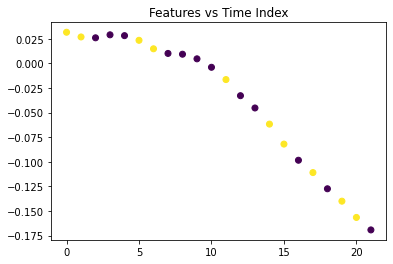

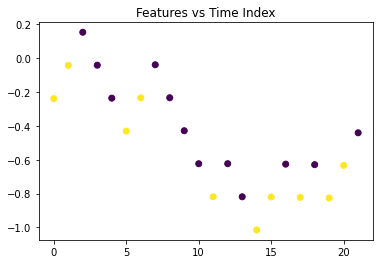

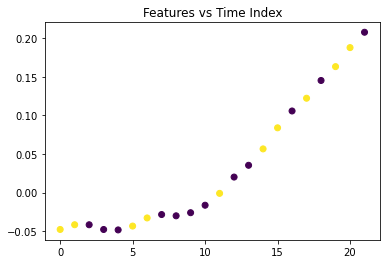

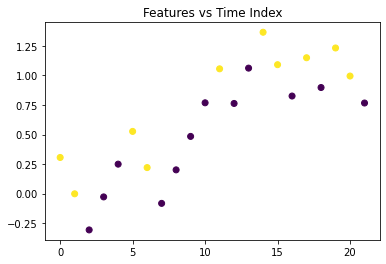

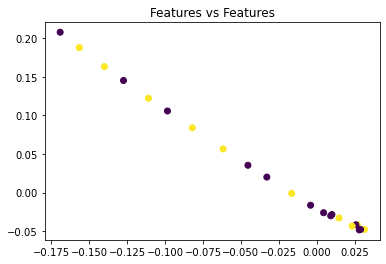

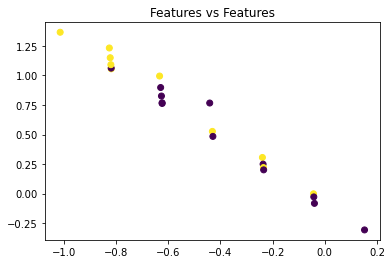

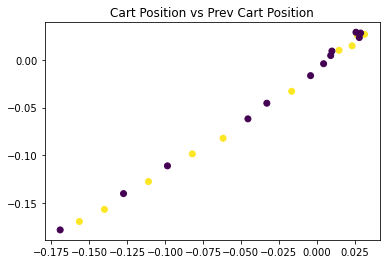

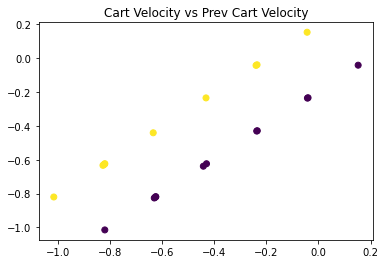

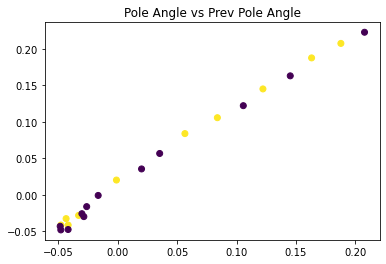

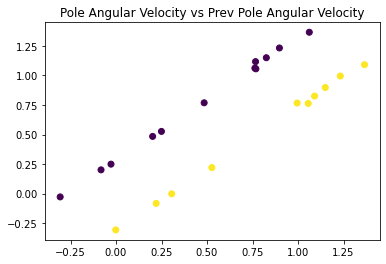

In [80]:
plt.figure()
plt.title('Features vs Time Index')
plt.scatter(dfa.index, dfa['state_var1'], c=dfa['action'])
plt.figure()
plt.title('Features vs Time Index')
plt.scatter(dfa.index, dfa['state_var2'], c=dfa['action'])
plt.figure()
plt.title('Features vs Time Index')
plt.scatter(dfa.index, dfa['state_var3'], c=dfa['action'])
plt.figure()
plt.title('Features vs Time Index')
plt.scatter(dfa.index, dfa['state_var4'], c=dfa['action'])

plt.figure()
plt.title('Features vs Features')
plt.scatter(dfa['state_var1'], dfa['state_var3'], c=dfa['action'])

plt.figure()
plt.title('Features vs Features')
plt.scatter(dfa['state_var2'], dfa['state_var4'], c=dfa['action'])

plt.figure()
plt.title('Cart Position vs Prev Cart Position')
plt.scatter(dfa['state_var1'], dfa['next_state_var1'], c=dfa['action'])
plt.figure()
plt.title('Cart Velocity vs Prev Cart Velocity')
plt.scatter(dfa['state_var2'], dfa['next_state_var2'], c=dfa['action'])
plt.figure()
plt.title('Pole Angle vs Prev Pole Angle')
plt.scatter(dfa['state_var3'], dfa['next_state_var3'], c=dfa['action'])
plt.figure()
plt.title('Pole Angular Velocity vs Prev Pole Angular Velocity')
plt.scatter(dfa['state_var4'], dfa['next_state_var4'], c=dfa['action'])

In [81]:
df = dfa.drop('action', axis=1)

properties = list(df.columns.values)
properties.remove('policy_action')
X = df[properties]
y = df['policy_action']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(8,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=1)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/50
15/15 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.8000
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.9333
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3998 - accuracy: 0.9333
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.9333
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.9333
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 1.0000
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 0.2583 - accuracy: 1.0000
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 1.0000
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 1.0000
Epoch 11/50
15/15 [

In [82]:
X

,state_var1,state_var2,state_var3,state_var4,next_state_var1,next_state_var2,next_state_var3,next_state_var4
0,0.031524,-0.239197,-0.047797,0.305961,0.026740,-0.043428,-0.041678,-0.001405
1,0.026740,-0.043428,-0.041678,-0.001405,0.025871,0.152266,-0.041706,-0.306941
2,0.025871,0.152266,-0.041706,-0.306941,0.028916,-0.042237,-0.047845,-0.027698
3,0.028916,-0.042237,-0.047845,-0.027698,0.028072,-0.236641,-0.048399,0.249514
4,0.028072,-0.236641,-0.048399,0.249514,0.023339,-0.431040,-0.043409,0.526547
5,0.023339,-0.431040,-0.043409,0.526547,0.014718,-0.235335,-0.032878,0.220508
6,0.014718,-0.235335,-0.032878,0.220508,0.010011,-0.039759,-0.028468,-0.082362
7,0.010011,-0.039759,-0.028468,-0.082362,0.009216,-0.234461,-0.030115,0.201205
8,0.009216,-0.234461,-0.030115,0.201205,0.004527,-0.429140,-0.026091,0.484238
9,0.004527,-0.429140,-0.026091,0.484238,-0.004056,-0.623884,-0.016406,0.768585


In [83]:
y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
Name: policy_action, dtype: int64